In [1]:
from sklearn import svm, datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
x = iris.data[:, 0:2]
y = iris.target

In [3]:
x_train,x_test, y_train, y_test = train_test_split(x, y)

In [32]:
#chaing the values of C to very high leads to overfitting and extremely complex decision boundaries
# gamma large means overfitting
clf = svm.SVC(kernel = 'rbf')
clf.fit(x_train, y_train)

SVC()

In [33]:
clf.score(x_test, y_test)

0.8421052631578947

In [34]:
def makegrid(x1, x2, h = 0.02):
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    a = np.arange(x1_min,x1_max,h)
    b = np.arange(x2_min, x2_max, h)
    xx, yy = np.meshgrid(a, b)
    return xx, yy

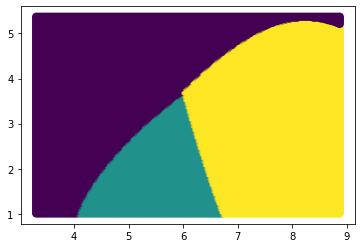

In [35]:
xx, yy = makegrid(x[:, 0], x[:, 1])
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.show()

In [41]:
## Grid search is used to determine which values of C & gamma will be the best
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [42]:
clf = KNeighborsClassifier()

In [44]:
grid = {"n_neighbors": [3, 5, 7, 9]}
abc = GridSearchCV(clf, grid)

In [46]:
abc.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [47]:
abc.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [52]:
(abc.cv_results_)

{'mean_fit_time': array([0.00039902, 0.00041161, 0.00039887, 0.00039892]),
 'std_fit_time': array([0.00079803, 0.00050441, 0.00048852, 0.00048858]),
 'mean_score_time': array([0.00119681, 0.00118499, 0.0009923 , 0.00099764]),
 'std_score_time': array([3.99149628e-04, 3.92098948e-04, 1.01399396e-05, 9.24621555e-07]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9}],
 'split0_test_score': array([0.73913043, 0.86956522, 0.91304348, 0.82608696]),
 'split1_test_score': array([0.65217391, 0.65217391, 0.65217391, 0.65217391]),
 'split2_test_score': array([0.77272727, 0.77272727, 0.81818182, 0.81818182]),
 'split3_test_score': array([0.63636364, 0.59090909, 0.86363636, 0.77272727]),
 'split4_test_score': array([0.77272727, 0.81818182, 0.81818182, 0.86363636]),
 'mean_test_score': array([0.7146

In [54]:
clf2 = svm.SVC()
grid = {'C' : [1e2, 1e3, 1e4, 1e5 ] ,'gamma': [1e-3, 1e-5, 1e-6]}

In [55]:
abc = GridSearchCV(clf2, grid)

In [56]:
abc.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [100.0, 1000.0, 10000.0, 100000.0],
                         'gamma': [0.001, 1e-05, 1e-06]})

In [57]:
abc.best_estimator_

SVC(C=100.0, gamma=0.001)